# 네이버 뉴스 스크래핑

In [1]:
import requests

In [2]:
import lxml.html

In [3]:
import csv

In [4]:
url = 'http://news.naver.com/main/search/search.nhn?query=%BA%F2%B5%A5%C0%CC%C5%CD&ie=MS949&x=0&y=0&page={}'

In [5]:
with open('news.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 21):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   # 네이버 뉴스 링크
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

# 스크래핑된 뉴스 읽어오기

In [6]:
import csv

In [7]:
news = []
with open('news.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

# 형태소 분석기

In [8]:
from konlpy.tag import Twitter

In [9]:
tagger = Twitter()

# Term-Document Matrix 만들기

[CountVectorizer 문서](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [12]:
tdf = cv.fit_transform(news)

In [13]:
tdf

<180x50 sparse matrix of type '<class 'numpy.int64'>'
	with 4590 stored elements in Compressed Sparse Row format>

# 단어 목록

In [122]:
words = cv.get_feature_names()

In [123]:
words

['개',
 '거래',
 '것',
 '결과',
 '고객',
 '긍정',
 '기술',
 '기업',
 '기자',
 '날',
 '년',
 '뉴스',
 '뉴시스',
 '단계',
 '대해',
 '데이터',
 '등',
 '만',
 '매우',
 '멜론',
 '명',
 '및',
 '복지',
 '분석',
 '빅데이터',
 '산업',
 '상품',
 '서비스',
 '서울',
 '세상',
 '수',
 '수준',
 '시',
 '시장',
 '심리',
 '억원',
 '오전',
 '월',
 '이',
 '일',
 '전',
 '정보',
 '종목',
 '지수',
 '지원',
 '최근',
 '코스피',
 '통해',
 '투자',
 '팁코']

# 한 글자 짜리 단어 빼기

In [202]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [203]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [204]:
tdf = cv.fit_transform(news)

In [205]:
words = cv.get_feature_names()

In [206]:
words

['가장',
 '개인',
 '거래',
 '결과',
 '고객',
 '긍정',
 '기반',
 '기술',
 '기업',
 '기자',
 '뉴스',
 '뉴시스',
 '단계',
 '대상자',
 '대해',
 '데이터',
 '레벨',
 '매우',
 '멜론',
 '모바일',
 '복지',
 '분기',
 '분석',
 '빅데이터',
 '사업',
 '산업',
 '삼성',
 '상품',
 '서비스',
 '서울',
 '세상',
 '수준',
 '시장',
 '실적',
 '심리',
 '약간',
 '억원',
 '오전',
 '오후',
 '정보',
 '종목',
 '지수',
 '지원',
 '최근',
 '코스콤',
 '코스피',
 '통해',
 '투자',
 '팁코',
 '한국']

# 단어별 출현 빈도

In [208]:
import numpy

In [209]:
count_mat = tdf.sum(axis=0)

In [210]:
count_mat

matrix([[127, 127, 200, 189, 171, 155, 136, 147, 243, 244, 230, 388, 920,
         139, 179, 343, 138, 216, 172, 130, 210, 130, 278, 768, 132, 175,
         127, 160, 280, 187, 173, 212, 524, 126, 205, 140, 147, 156, 134,
         332, 455, 216, 154, 148, 143, 152, 167, 249, 155, 125]], dtype=int64)

In [211]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [212]:
count

array([127, 127, 200, 189, 171, 155, 136, 147, 243, 244, 230, 388, 920,
       139, 179, 343, 138, 216, 172, 130, 210, 130, 278, 768, 132, 175,
       127, 160, 280, 187, 173, 212, 524, 126, 205, 140, 147, 156, 134,
       332, 455, 216, 154, 148, 143, 152, 167, 249, 155, 125], dtype=int64)

In [213]:
word_count = list(zip(words, count))

In [214]:
word_count

[('가장', 127),
 ('개인', 127),
 ('거래', 200),
 ('결과', 189),
 ('고객', 171),
 ('긍정', 155),
 ('기반', 136),
 ('기술', 147),
 ('기업', 243),
 ('기자', 244),
 ('뉴스', 230),
 ('뉴시스', 388),
 ('단계', 920),
 ('대상자', 139),
 ('대해', 179),
 ('데이터', 343),
 ('레벨', 138),
 ('매우', 216),
 ('멜론', 172),
 ('모바일', 130),
 ('복지', 210),
 ('분기', 130),
 ('분석', 278),
 ('빅데이터', 768),
 ('사업', 132),
 ('산업', 175),
 ('삼성', 127),
 ('상품', 160),
 ('서비스', 280),
 ('서울', 187),
 ('세상', 173),
 ('수준', 212),
 ('시장', 524),
 ('실적', 126),
 ('심리', 205),
 ('약간', 140),
 ('억원', 147),
 ('오전', 156),
 ('오후', 134),
 ('정보', 332),
 ('종목', 455),
 ('지수', 216),
 ('지원', 154),
 ('최근', 148),
 ('코스콤', 143),
 ('코스피', 152),
 ('통해', 167),
 ('투자', 249),
 ('팁코', 155),
 ('한국', 125)]

# 빈도 순 정렬

In [215]:
import operator

In [216]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('단계', 920),
 ('빅데이터', 768),
 ('시장', 524),
 ('종목', 455),
 ('뉴시스', 388),
 ('데이터', 343),
 ('정보', 332),
 ('서비스', 280),
 ('분석', 278),
 ('투자', 249),
 ('기자', 244),
 ('기업', 243),
 ('뉴스', 230),
 ('매우', 216),
 ('지수', 216),
 ('수준', 212),
 ('복지', 210),
 ('심리', 205),
 ('거래', 200),
 ('결과', 189),
 ('서울', 187),
 ('대해', 179),
 ('산업', 175),
 ('세상', 173),
 ('멜론', 172),
 ('고객', 171),
 ('통해', 167),
 ('상품', 160),
 ('오전', 156),
 ('긍정', 155),
 ('팁코', 155),
 ('지원', 154),
 ('코스피', 152),
 ('최근', 148),
 ('기술', 147),
 ('억원', 147),
 ('코스콤', 143),
 ('약간', 140),
 ('대상자', 139),
 ('레벨', 138),
 ('기반', 136),
 ('오후', 134),
 ('사업', 132),
 ('모바일', 130),
 ('분기', 130),
 ('가장', 127),
 ('개인', 127),
 ('삼성', 127),
 ('실적', 126),
 ('한국', 125)]

# 워드 클라우드

[Unofficial Windows Binaries for Python Extension Packages](http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud)에서 **
wordcloud**-1.2.1-**cp35**-cp35m-win_**amd64**.whl를 다운받은 다음, 명령창에서 아래 명령을 실행:

```
pip install wordcloud-1.2.1-cp35-cp35m-win_amd54.whl
```

In [222]:
%matplotlib inline

In [282]:
from wordcloud import WordCloud

In [224]:
from matplotlib import pyplot

워드 클라우드 만들기

자세한 내용은 http://amueller.github.io/word_cloud/index.html 참고

In [299]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

화면에 표시

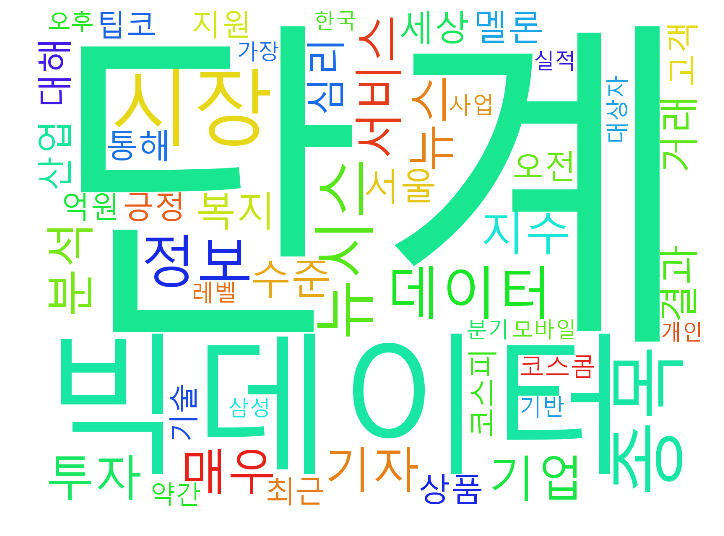

In [301]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

# 단어간 상관계수

In [217]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)

In [218]:
word_corr

array([[ 1.        , -0.05700056,  0.42614628, ...,  0.34449419,
         0.00250768,  0.14420351],
       [-0.05700056,  1.        ,  0.04961311, ..., -0.08538509,
        -0.11327026, -0.0423338 ],
       [ 0.42614628,  0.04961311,  1.        , ...,  0.37617989,
        -0.11218421, -0.01802255],
       ..., 
       [ 0.34449419, -0.08538509,  0.37617989, ...,  1.        ,
        -0.1730983 ,  0.3840468 ],
       [ 0.00250768, -0.11327026, -0.11218421, ..., -0.1730983 ,
         1.        , -0.09092959],
       [ 0.14420351, -0.0423338 , -0.01802255, ...,  0.3840468 ,
        -0.09092959,  1.        ]])

# 상관관계 높은 것 100개만 추리기

In [219]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

상관계수 높은 순으로 정렬

In [220]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [263]:
edges = edges[:50]

In [275]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

# 상관관계 시각화

In [223]:
import networkx

In [264]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

* [spring layout](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout)
* [draw_networkx_nodes](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html#networkx.drawing.nx_pylab.draw_networkx_nodes)
* [draw_networkx_edges](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html#networkx.drawing.nx_pylab.draw_networkx_edges)
* [draw_networkx_labels](http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html#networkx.drawing.nx_pylab.draw_networkx_labels)

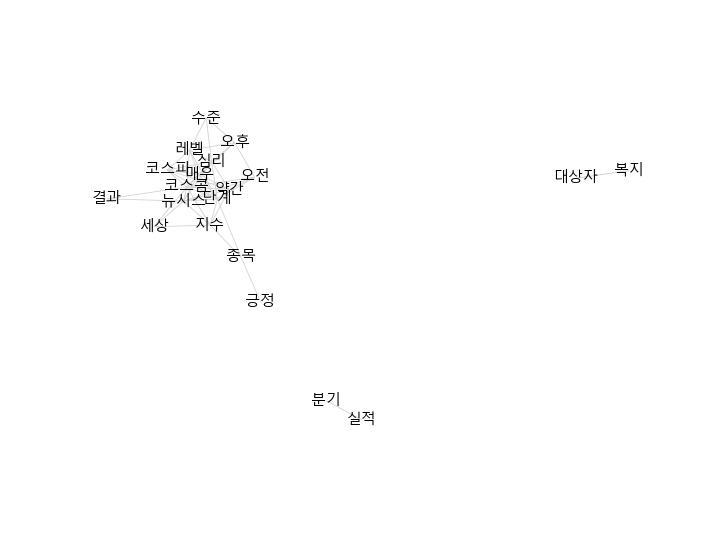

In [280]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
plt.axis('off')
pyplot.show()